# Transductive binary node classification by label propagation

In [1]:
# --------------------------------------------------
# Libraries
# --------------------------------------------------
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# --------------------------------------------------
# Geberate graph data
# --------------------------------------------------

# Probability
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]

# Data size
n1 = 50
n2 = 50
n = n1 +n2

# Graph
G = nx.stochastic_block_model([n1, n2], probs, seed = 0)

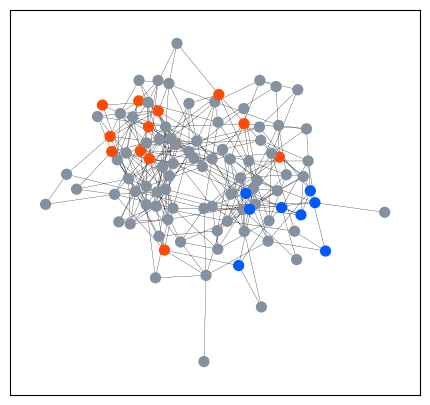

In [3]:
# --------------------------------------------------
# Label
# --------------------------------------------------

# Train-test split
np.random.seed(seed = 0)
train_size = 20
L = np.random.choice(n, size = train_size, replace = False)
U = np.array(list(set(range(n)) - set(L.tolist())))

# Label
f = np.array([1 if np.random.rand() < p else 0 for p in [0.8 if i < n1 else 0.2 for i in L]])

# Plot
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(1, 3, 1)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and f[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and f[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        c[i] = '#84919e'
pos = nx.layout.spring_layout(G, seed=3)
nx.draw_networkx(G, pos, ax = ax, with_labels = False, width = 0.2, node_size = 50, node_color = c)

In [4]:
# --------------------------------------------------
# Label propagation
# --------------------------------------------------

# Graph matrix
W = nx.adjacency_matrix(G).todense() # Adjacency matrix
D = np.diag(W.sum(1)) # Degree matrix

# Create equation Ax = b
A = D[U][:, U] - W[U][:, U]
b = W[U][:, L]@f

# Solve
def solve_Ax_b(A, b):
    # QR decomposition
    Q, R = np.linalg.qr(A)
    # Backsolve
    x = np.zeros(A.shape[1])
    for i in reversed(range(0, A.shape[1])):
        x[i] = (Q.T@b)[i]
        for k in range(i + 1, A.shape[1]):
            x[i] -= R[i][k]*x[k]
        x[i] /= R[i][i]
    return x
predicted_values = solve_Ax_b(A, b)

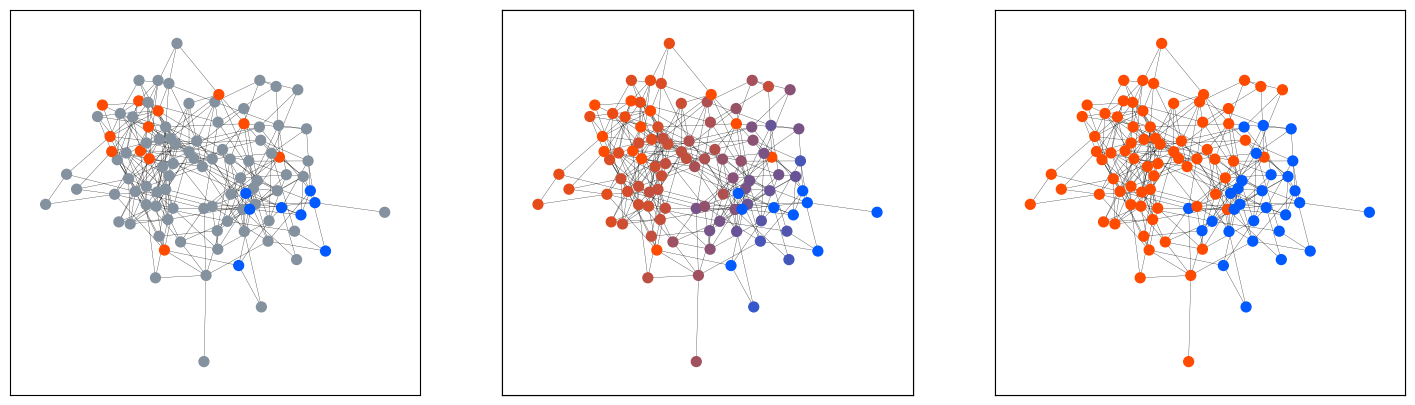

In [10]:
# --------------------------------------------------
# Plot result
# --------------------------------------------------

# Predicted values
ax = fig.add_subplot(1, 3, 2)
c = [None for i in range(n)]
for i in range(n):
    if i in L and f[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and f[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = predicted_values[U.tolist().index(i)]
        c[i] = (p, 0.294 * p + 0.353 * (1 - p), 1 - p)
c = np.array(c, dtype=object)
nx.draw_networkx(G, pos, ax = ax, with_labels = False, width = 0.2, node_size = 50, node_color = c)

# Predicted values (Binary)
ax = fig.add_subplot(1, 3, 3)
c = [0 for i in range(n)]
for i in range(n):
    if i in L and f[L.tolist().index(i)] == 1:
        c[i] = '#ff4b00'
    elif i in L and f[L.tolist().index(i)] == 0:
        c[i] = '#005aff'
    else:
        p = predicted_values[U.tolist().index(i)]
        if p > 0.5:
            c[i] = '#ff4b00'
        else:
            c[i] = '#005aff'
nx.draw_networkx(G, pos, ax = ax, with_labels = False, width  =0.2, node_size = 50, node_color = c)

# Show
fig